In [1]:
import networkx as nx
import seaborn as sns 
from IPython.display import IFrame, display # TODO understand how to use visualization without it
import numpy as np
from datetime import datetime
import pandas as pd
import json
from functools import wraps

import graphviz
from graphviz import Digraph

from holder import DataHolder
from _graph import Graph

In [4]:
def DFG(holder):
    graph = Graph()

    statuses = holder.preproc_data[holder.status_column].unique()
    for status in statuses:
        graph.add_node(str(status))

    status_id = {}
    for i, status in enumerate(statuses):
        status_id[str(status)] = i

    holder.preproc_data['from'] = holder.preproc_data.groupby([holder.id_column])[holder.status_column].shift(1)

    trans_mat = np.zeros((len(statuses), len(statuses)))
    for _, row in holder.preproc_data.iterrows():
        if pd.isna(row['from']):
            continue

        node1 = status_id[str(row[holder.status_column])]
        node0 = status_id[str(row['from'])]
        trans_mat[node0, node1] += 1

    for i in range(len(statuses)): 
        for j in range(len(statuses)):
            if trans_mat[i,j]!=0 and trans_mat[j,i]==0: #directly follows
                graph.add_edge(str(statuses[i]), str(statuses[j]))

    return graph

In [5]:
data = pd.read_csv("synthetic_process_mining_dataset5.csv")
holder = DataHolder(data, 'id', 'stages', 'dt')
holder.get_data().head()

,id,stages,dt
0,0.0,Stage_0,2019-12-01
1,0.0,Stage_3,2019-12-02
2,0.0,Stage_5,2019-12-05
3,0.0,Stage_2,2019-12-11
4,0.0,Stage_7,2019-12-17


In [6]:
graph = DFG(holder)

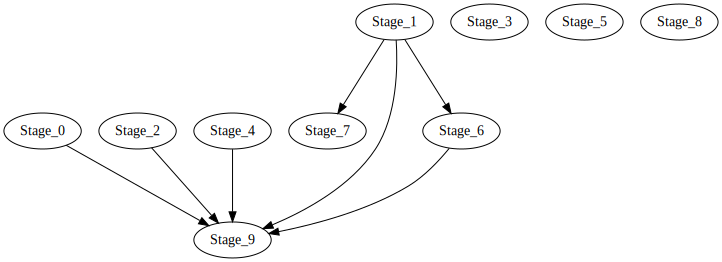

In [7]:
graph.graph

In [34]:
nodes = [{'pk':i+1, 'index':i, 'name':node, 'x':70*i, 'y':300+20*i, 'type':'suit', 'degree':4}
         for i, node in enumerate(graph.get_nodes())]

In [35]:
node2ind = {}
for i, node in enumerate(graph.get_nodes()):
    node2ind[node] = i

In [45]:
edges = [{'source': nodes[node2ind[edge[0]]], 'target':nodes[node2ind[edge[1]]], 'weight':0.4, 'type':'suit'} for edge in graph.get_edge()]

In [46]:
with open("template.txt", 'r') as f:
    __TEMPLATE__ = f.read()

In [47]:
node_params = {
                'positive_target_event': 'nice_target',
                'negative_target_event': 'bad_target',
                'source_event': 'source',
            }

In [48]:
node_stats = {}

In [49]:
# nodes = [{'pk': 1, 'index': 0, 'name': '1', 'x': 600, 'y': 500, 'type': 'bad_node', 'degree': 4},
#         {'pk': 2, 'index': 1, 'name': '2', 'x': 800, 'y': 500,  'type': 'nice_node', 'degree': 4},
#         {'pk': 3, 'index': 2, 'name': '3', 'x': 400, 'y': 300,  'type': 'suit', 'degree': 4}]

In [50]:
# links = [{'source': nodes[0], 'target': nodes[1], 'weight': 0.4, 'weight_mean': 'mean', 
#           'weight_min': 'min', 'weight_max': 'max', 'type': 'nice_target'},
#         {'source': nodes[2], 'target': nodes[0], 'weight': 0.4, 'weight_mean': 'mean', 
#           'weight_min': 'min', 'weight_max': 'max', 'type': 'bad_target'},
#         {'source': nodes[2], 'target': nodes[1], 'weight': 0.1, 'weight_mean': 'mean', 
#           'weight_min': 'min', 'weight_max': 'max', 'type': 'suit'}]

In [51]:
x = __TEMPLATE__.format(
        width=1000,
        height=1000,
        links=json.dumps(edges).encode('latin1').decode('utf-8'),
        node_params=json.dumps(node_params).encode('latin1').decode('utf-8'),
        nodes=json.dumps(nodes).encode('latin1').decode('utf-8'),
        node_stats=json.dumps(node_stats).encode('latin1').decode('utf-8')
        )

In [52]:
with open('test1.html', 'w') as f:
        f.write(x)

In [53]:
display(IFrame('test1.html', width=1000, height=1200))